In [2]:
import sys
print(sys.version) # 3.12
import numpy as np # !pip3 install numpy
import pandas as pd # !pip3 install pandas
import matplotlib.pyplot as plt # !pip3 install matplotlib
import seaborn as sns # !ip install seaborn
sns.set_theme()
import yfinance as yf # !pip3 install yfinance
from statsmodels.tsa.api import ExponentialSmoothing # !pip3 install statsmodels

3.11.6 (main, Oct  2 2023, 13:45:54) [Clang 15.0.0 (clang-1500.0.40.1)]


In [3]:
def retrieve_hist_assets(assets: list, window_range="2y") -> list:
    """Retrieve asset history values.

    Ecrire une fonction qui prend en entrée une liste de 5 actifs et qui renvoie les prix journaliers sur
    une fenêtre de 2 à 3 ans (le choix est donné à l’utilisateur) à partir de Yahoo Finance.

    N.B.:
        - package link: https://pypi.org/project/yfinance/
    :param assets: list of assets (max 5)
    :return: asset historical list
    """
    if len(assets) > 5:
        raise ValueError("On ne peut pas avoir plus de 5 assets!")
    if not window_range in ["2y", "3y"]:
        raise ValueError("Tu peux seulement demander 2y -> historique 2 ans ou 3y -> ...")
    df = pd.DataFrame()
    for asset in assets:
        msft = yf.Ticker(asset)
        hist = msft.history(period=window_range)
        hist_df = pd.DataFrame(hist)
        hist_df["actif"] = asset
        hist_df = hist_df.reset_index()
        if df.empty:
            df = hist_df.copy()
        else:
            df = pd.concat([df, hist_df])
    df["jour"] = df.Date.dt.strftime('%Y-%m-%d')
    df["mois"] = df.Date.dt.strftime('%Y-%m')
    df["annee"] = df.Date.dt.strftime('%Y')
    df = df.drop(columns=["Dividends", "Stock Splits"])
    return df.reset_index()

df = retrieve_hist_assets(assets=["AAPL", "MSFT", "AMZN", "GOOG", "TSLA"], window_range="2y")
df.sample(30)

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee
1670,164,2022-08-30 00:00:00-04:00,111.029999,111.370003,108.800003,109.910004,20548200,GOOG,2022-08-30,2022-08,2022
1277,273,2023-02-06 00:00:00-05:00,102.930000,103.949997,100.650002,102.180000,81945200,AMZN,2023-02-06,2023-02,2023
1141,137,2022-07-22 00:00:00-04:00,125.010002,125.500000,121.349998,122.419998,51463800,AMZN,2022-07-22,2022-07,2022
1172,168,2022-09-06 00:00:00-04:00,127.919998,128.619995,124.739998,126.110001,43888600,AMZN,2022-09-06,2022-09,2022
1589,83,2022-05-04 00:00:00-04:00,118.003502,123.142998,115.738503,122.574997,33232000,GOOG,2022-05-04,2022-05,2022
2396,388,2023-07-24 00:00:00-04:00,255.850006,269.850006,254.119995,269.059998,136508500,TSLA,2023-07-24,2023-07,2023
1991,485,2023-12-08 00:00:00-05:00,135.660004,137.990005,135.570007,136.639999,22990900,GOOG,2023-12-08,2023-12,2023
1335,331,2023-05-01 00:00:00-04:00,104.949997,105.230003,101.820000,102.050003,74728100,AMZN,2023-05-01,2023-05,2023
784,282,2023-02-17 00:00:00-05:00,257.754216,258.449784,254.385580,256.432587,30000100,MSFT,2023-02-17,2023-02,2023
1925,419,2023-09-06 00:00:00-04:00,137.014999,137.479996,134.690002,135.369995,15814300,GOOG,2023-09-06,2023-09,2023


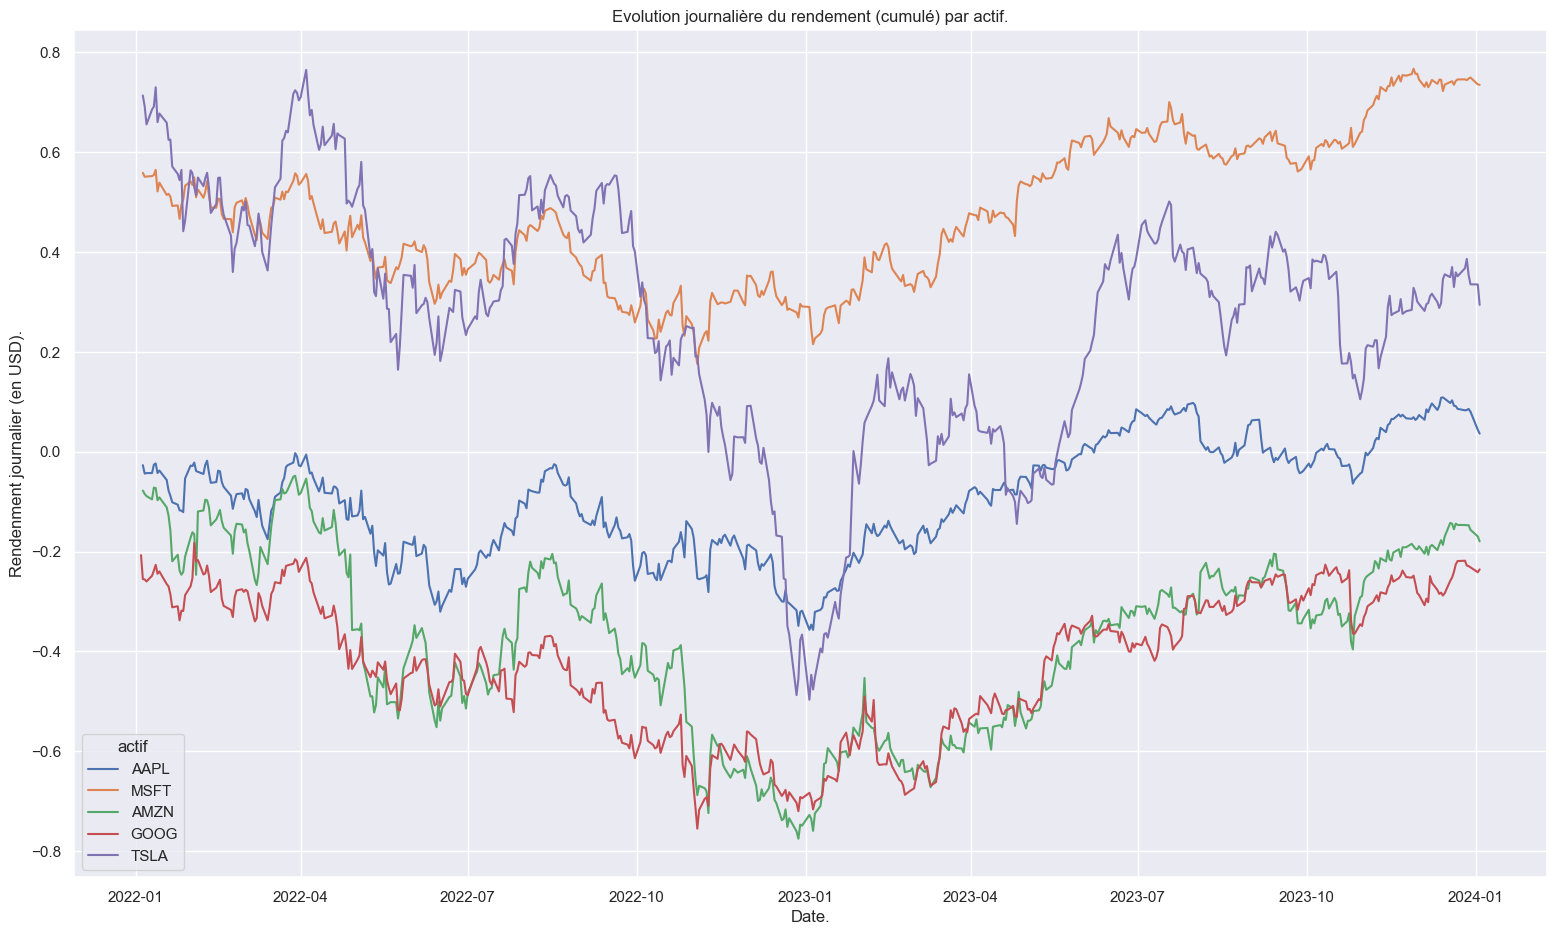

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_Qtot,Rendement_Qtot_mean_month,Rendement_Qtot_mean_year
2480,472,2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,TSLA,2023-11-20,2023-11,2023,0.005533,0.008498,0.002807
2481,473,2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,TSLA,2023-11-21,2023-11,2023,0.023491,0.008498,0.002807
2482,474,2023-11-22 00:00:00-05:00,242.039993,244.009995,231.399994,234.210007,117950600,TSLA,2023-11-22,2023-11,2023,-0.029408,0.008498,0.002807
2483,475,2023-11-24 00:00:00-05:00,233.750000,238.750000,232.330002,235.449997,65125200,TSLA,2023-11-24,2023-11,2023,0.005280,0.008498,0.002807
2484,476,2023-11-27 00:00:00-05:00,236.889999,238.330002,232.100006,236.080002,112031800,TSLA,2023-11-27,2023-11,2023,0.002672,0.008498,0.002807
2485,477,2023-11-28 00:00:00-05:00,236.679993,247.000000,234.009995,246.720001,148549900,TSLA,2023-11-28,2023-11,2023,0.044083,0.008498,0.002807
2486,478,2023-11-29 00:00:00-05:00,249.210007,252.750000,242.759995,244.139999,135401300,TSLA,2023-11-29,2023-11,2023,-0.010512,0.008498,0.002807
2487,479,2023-11-30 00:00:00-05:00,245.139999,245.220001,236.910004,240.080002,132353200,TSLA,2023-11-30,2023-11,2023,-0.016770,0.008498,0.002807
2488,480,2023-12-01 00:00:00-05:00,233.139999,240.190002,231.899994,238.830002,121173500,TSLA,2023-12-01,2023-12,2023,-0.005220,0.001720,0.002807
2489,481,2023-12-04 00:00:00-05:00,235.750000,239.369995,233.289993,235.580002,104099800,TSLA,2023-12-04,2023-12,2023,-0.013701,0.001720,0.002807


In [4]:
def get_rendement(df: pd.DataFrame) -> pd.DataFrame:
    """
    Écrire une fonction qui calcule le rendement quotidien de chaque actif. Intégrez dans cette fonction
    une variable pour calculer le rendement espéré annualisé de chaque actif. Représentez dans le
    même graphique les rendements quotidiens des 5 actifs avec des légendes claires.
    
    N.B.:
        - I used np.log -> est-ce que c'est le bon log -> validé
        - d'ailleurs shift(1) ou shift(-1) -> shift 1
        - sum cumulé sur le lineplot?
        - à refaire avec le log en maplotlib????
        - Changer le nom de la colonne Rendement_Qtot en Rendement_quotidien?
        - Rotate des labels?
    """
    new_df = df.copy()
    new_df["Rendement_Qtot"] = np.log(
        new_df.Close/new_df.Close.shift(1)
    )
    rendement_moyen_mensuel_df = (
        new_df
        .groupby(["mois", "actif"])
        .agg({"Rendement_Qtot": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_Qtot": "Rendement_Qtot_mean_month"}
        )
    )
    rendement_moyen_annuel_df = (
        new_df
        .groupby(["annee", "actif"])
        .agg({"Rendement_Qtot": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_Qtot": "Rendement_Qtot_mean_year"}
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_mensuel_df,
            on=["actif", "mois"],
            how="left",
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_annuel_df,
            on=["actif", "annee"],
            how="left",
        )
    )
    plt.figure(figsize=(19, 11))
    plt.title("Evolution journalière du rendement (cumulé) par actif.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    new_df["Rendement_Qtot_cumul"] = new_df["Rendement_Qtot"].cumsum()
    new_show_df = ( # Juste pour faire ça joli, je filtre les outliers
        new_df[(new_df["Rendement_Qtot"] < 0.25) & (new_df["Rendement_Qtot"] > - 0.25)]
    )
    sns.lineplot(x=new_show_df["Date"], y=new_show_df["Rendement_Qtot_cumul"], hue=new_show_df["actif"])
    plt.show()
    return new_df.drop(columns=["Rendement_Qtot_cumul"])

df_2 = get_rendement(df=df)
df_2.tail(30)

In [5]:
def get_volatility_and_export_to_csv(df: pd.DataFrame, filename="loulou.csv") -> pd.DataFrame:
    """Compute volatility(daily, monthly & annualy) and export result to .csv

    Écrire une fonction pour calculer la volatilité quotidienne et mensuelle de chaque actif, stockant les
    résultats dans un fichier .csv. Définissez une autre variable pour calculer la volatilité annualisée de
    chaque actif.

    N.B.:
        - https://medium.com/@polanitzer/volatility-calculation-in-python-estimate-the-annualized-volatility-of-historical-stock-prices-db937366a54d
        - https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/
        - https://pyquantnews.com/how-to-compute-volatility-6-ways/
        - integrate squared into agg?
        - Merge all at once?
        - not clean
        - select before merging to avoid to drop columns
    """
    tmp_df = df.copy()
    tmp_df["Rendement_Qtot_squared"] = tmp_df["Rendement_Qtot"] ** 2
    tmp_df["Rendement_Qtot_mean_month_squared"] = tmp_df["Rendement_Qtot_mean_month"] ** 2
    tmp_df["Rendement_Qtot_mean_year_squared"] = tmp_df["Rendement_Qtot_mean_year"] ** 2
    print("Calcul volatilité quotidienne.")
    df_vol_daily = (
        tmp_df
        .groupby(["actif", "jour"])
        .agg({"Rendement_Qtot_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_daily["Daily_volatility"] = np.sqrt(df_vol_daily["Rendement_Qtot_squared"] / df_vol_daily["index"])
    print("Calcul volatilité mensuel.")
    df_vol_month = (
        tmp_df
        .groupby(["actif", "mois"])
        .agg({"Rendement_Qtot_mean_month_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_month["Monthly_volatility"] = np.sqrt(df_vol_month["Rendement_Qtot_mean_month_squared"] / df_vol_month["index"])
    print("Calcul volatilité annuel.")
    df_vol_year = (
        tmp_df
        .groupby(["actif", "annee"])
        .agg({"Rendement_Qtot_mean_year_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_year["Annual_volatility"] = np.sqrt(df_vol_year["Rendement_Qtot_mean_year_squared"] / df_vol_year["index"])
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_daily.drop(columns=["Rendement_Qtot_squared"]),
            left_on=["actif", "jour"],
            right_on=["actif", "jour"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_month.drop(columns=["Rendement_Qtot_mean_month_squared"]),
            left_on=["actif", "mois"],
            right_on=["actif", "mois"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_year.drop(columns=["Rendement_Qtot_mean_year_squared"]),
            left_on=["actif", "annee"],
            right_on=["actif", "annee"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = tmp_df.drop(columns=["Rendement_Qtot_squared", "Rendement_Qtot_mean_month_squared", "Rendement_Qtot_mean_year_squared"])
    print(f"Creation du fichier: {filename}")
    tmp_df.drop(columns=["index"]).to_csv(filename, index=False, sep=";")
    return tmp_df

df_3 = get_volatility_and_export_to_csv(df=df_2)
df_3.sample(20)

Calcul volatilité quotidienne.
Calcul volatilité mensuel.
Calcul volatilité annuel.
Creation du fichier: loulou.csv


,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_Qtot,Rendement_Qtot_mean_month,Rendement_Qtot_mean_year,Daily_volatility,Monthly_volatility,Annual_volatility
1830,324,2023-04-20 00:00:00-04:00,104.650002,106.888000,104.639999,105.900002,22515300,GOOG,2023-04-20,2023-04,2023,0.008344,0.002093,0.001851,0.008344,0.002093,0.001851
2205,197,2022-10-17 00:00:00-04:00,210.039993,221.860001,209.449997,219.350006,79428800,TSLA,2022-10-17,2022-10,2022,0.067707,-0.007302,-0.000522,0.067707,0.007302,0.000522
35,35,2022-02-24 00:00:00-05:00,151.048555,161.215479,150.474375,161.106583,141147500,AAPL,2022-02-24,2022-02,2022,0.016543,-0.002925,-0.001279,0.016543,0.002925,0.001279
2000,494,2023-12-21 00:00:00-05:00,140.770004,142.029999,140.473007,141.800003,18101500,GOOG,2023-12-21,2023-12,2023,0.015207,0.002551,0.001851,0.015207,0.002551,0.001851
1744,238,2022-12-14 00:00:00-05:00,95.540001,97.220001,93.940002,95.309998,26452900,GOOG,2022-12-14,2022-12,2022,-0.005650,-0.006379,-0.002059,0.005650,0.006379,0.002059
1940,434,2023-09-27 00:00:00-04:00,129.440002,131.720001,129.380005,131.460007,18764200,GOOG,2023-09-27,2023-09,2023,0.015408,-0.002043,0.001851,0.015408,0.002043,0.001851
2176,168,2022-09-06 00:00:00-04:00,272.679993,275.989990,265.739990,274.420013,55860000,TSLA,2022-09-06,2022-09,2022,0.015460,-0.001824,-0.000522,0.015460,0.001824,0.000522
1563,57,2022-03-28 00:00:00-04:00,140.684494,141.976501,139.828156,141.949997,23774000,GOOG,2022-03-28,2022-03,2022,0.003023,0.001507,-0.002059,0.003023,0.001507,0.002059
951,449,2023-10-18 00:00:00-04:00,331.816529,334.910256,327.635014,329.441345,23153600,MSFT,2023-10-18,2023-10,2023,-0.005890,0.003110,0.001835,0.005890,0.003110,0.001835
96,96,2022-05-23 00:00:00-04:00,136.607411,142.030466,136.468613,141.881760,117726300,AAPL,2022-05-23,2022-05,2022,0.039335,-0.002668,-0.001279,0.039335,0.002668,0.001279


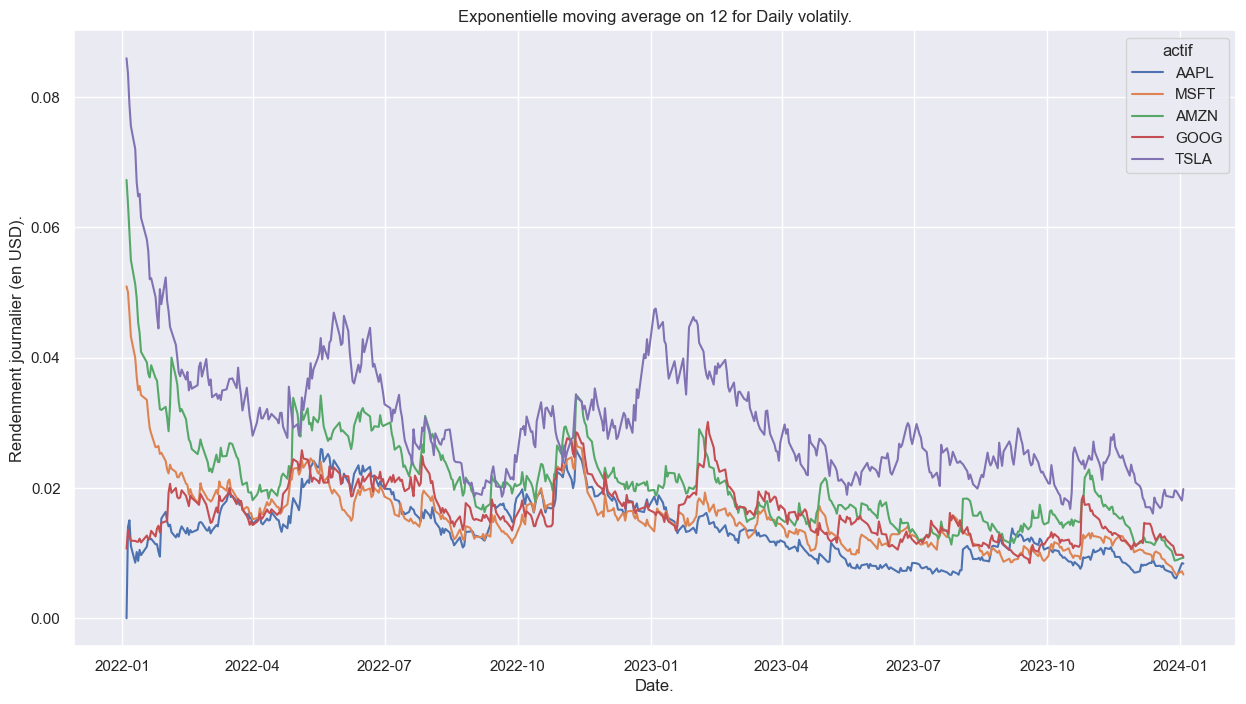

In [15]:
def smooth_model(df: pd.DataFrame) -> pd.DataFrame:
    """Smooth volatility using "Exponential moving average" model.

    Écrire une fonction pour calculer la Moyenne Mobile Pondérée Exponentiellement (EWMA : Expo-
    nential Weighted Moving Average en anglais) de chaque actif. Choisissez une valeur entre 0 et 1
    pour le paramètre inconnu du modèle EWMA.

    N.B.:
        - https://towardsdatascience.com/time-series-from-scratch-exponentially-weighted-moving-averages-ewma-theory-and-implementation-607661d574fe
        - https://github.com/BessieChen/Python-for-Financial-Analysis-and-Algorithmic-Trading/blob/master/08-Time-Series-Analysis/2-EWMA-Exponentially-weighted-moving-average.ipynb
        - Look nice but not sure about what column to use for EWMA.
        - Mayeb using statsmodels.EMWA will be better -> more related to the class.
        - what does "com=12" -> Smooth on 12 months?
    """
    df["Daily_volatility_ewm12"] = df.Daily_volatility.ewm(com=12).mean()
    plt.figure(figsize=(15, 8))
    plt.title("Exponentielle moving average on 12 for Daily volatily.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    sns.lineplot(x=df.Date, y=df.Daily_volatility_ewm12, hue=df.actif)
    return df

df_4 = smooth_model(df=df_3)
df_4.sample(10)